## A : Analysis of the mushroom dataset
#### Michael Danaher - 18221726
#### Aaron Foster -
#### Bandile Tshabalala - 18246923
#### John Maguire -

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_recall_fscore_support
import pickle
%matplotlib inline

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("mushrooms_sample.csv")

### B - Exploratory data analysis and clustering

In [2]:
# Checking the first 5 rows of the dataframe
df.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,f,e,t,n,f,c,b,u,t,...,p,g,p,w,o,p,k,v,d,e
1,f,y,g,t,n,f,c,b,u,t,...,w,g,p,w,o,p,k,v,d,e
2,x,s,p,t,n,f,c,b,w,e,...,w,e,p,w,t,e,w,c,w,e
3,b,s,w,f,n,f,w,b,g,e,...,w,w,p,w,t,p,w,n,g,e
4,f,y,e,t,n,f,c,b,w,t,...,p,p,p,w,o,p,n,v,d,e


In [3]:
# Checking the last 5 rows of the dataframe
df.tail()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
3995,f,y,e,f,y,f,c,n,b,t,...,p,p,p,w,o,e,w,v,p,p
3996,f,s,w,t,n,f,c,b,w,e,...,w,w,p,w,t,p,r,v,g,p
3997,f,s,w,t,n,f,c,b,w,e,...,w,w,p,w,t,p,r,v,m,p
3998,f,y,e,f,s,f,c,n,b,t,...,p,p,p,w,o,e,w,v,l,p
3999,f,s,n,f,y,f,c,n,b,t,...,p,w,p,w,o,e,w,v,d,p


In [4]:
print('(number of examples, number of attributes): ', df.shape)

(number of examples, number of attributes):  (4000, 23)


In [5]:
df['class'].value_counts()

p    2000
e    2000
Name: class, dtype: int64

Checking my dataset for missing values and outliers.

In [6]:
df2 = df
df.isna().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises%3F                     0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  1230
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
class                          0
dtype: int64

We have many missing values for stalk-root, so we will drop this attribute.

For this task, we are going to examine if the mushroom is edible based off its `cap` , `bruises` , `gill` , `odor` , `population` , `spore` , `habitat` and `class`.

In [7]:
df = df.drop(['stalk-root','stalk-shape','stalk-surface-above-ring',
              'stalk-surface-below-ring','stalk-color-below-ring','stalk-color-above-ring',
              'veil-type','veil-color'], axis=1)
df.isna().sum()

cap-shape            0
cap-surface          0
cap-color            0
bruises%3F           0
odor                 0
gill-attachment      0
gill-spacing         0
gill-size            0
gill-color           0
ring-number          0
ring-type            0
spore-print-color    0
population           0
habitat              0
class                0
dtype: int64

In [8]:
df['habitat'].value_counts()

d    1548
g    1023
p     582
l     404
u     197
m     148
w      98
Name: habitat, dtype: int64

Now we will encode all the labels from the categorical attributes

### Process and Encode the Categorical Features as Numerical


In [9]:
from sklearn.preprocessing import LabelEncoder
def label_encoded(feat):
    le = LabelEncoder()
    le.fit(feat)
    print(feat.name,le.classes_)
    return le.transform(feat)

for col in df.columns:
    df[str(col)] = label_encoded(df[str(col)])

cap-shape ['b' 'c' 'f' 'k' 's' 'x']
cap-surface ['f' 'g' 's' 'y']
cap-color ['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']
bruises%3F ['f' 't']
odor ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
gill-attachment ['a' 'f']
gill-spacing ['c' 'w']
gill-size ['b' 'n']
gill-color ['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
ring-number ['n' 'o' 't']
ring-type ['e' 'f' 'l' 'n' 'p']
spore-print-color ['b' 'h' 'k' 'n' 'o' 'r' 'u' 'w' 'y']
population ['a' 'c' 'n' 's' 'v' 'y']
habitat ['d' 'g' 'l' 'm' 'p' 'u' 'w']
class ['e' 'p']


In [10]:
df.tail()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,ring-number,ring-type,spore-print-color,population,habitat,class
3995,2,3,2,0,8,1,0,1,0,1,0,7,4,4,1
3996,2,2,8,1,5,1,0,0,10,2,4,5,4,1,1
3997,2,2,8,1,5,1,0,0,10,2,4,5,4,3,1
3998,2,3,2,0,7,1,0,1,0,1,0,7,4,2,1
3999,2,2,4,0,8,1,0,1,0,1,0,7,4,0,1


In [11]:
df.describe()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,4000.000000,4000.00000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,3.322500,1.83900,4.458500,0.41650,4.135000,0.975250,0.154000,0.319000,4.77525,1.069500,2.288000,3.605500,3.667000,1.544000,0.500000
std,1.595973,1.22921,2.507658,0.49304,2.111727,0.155382,0.360994,0.466147,3.56685,0.269607,1.800102,2.398918,1.224943,1.746662,0.500063
min,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.00000,3.000000,0.00000,2.000000,1.000000,0.000000,0.000000,2.00000,1.000000,0.000000,2.000000,3.000000,0.000000,0.000000
50%,3.000000,2.00000,4.000000,0.00000,5.000000,1.000000,0.000000,0.000000,5.00000,1.000000,2.000000,3.000000,4.000000,1.000000,0.500000
75%,5.000000,3.00000,7.000000,1.00000,5.000000,1.000000,0.000000,1.000000,7.00000,1.000000,4.000000,7.000000,4.000000,3.000000,1.000000
max,5.000000,3.00000,9.000000,1.00000,8.000000,1.000000,1.000000,1.000000,11.00000,2.000000,4.000000,8.000000,5.000000,6.000000,1.000000


In [12]:
print("Dataset shape:", df.shape)

Dataset shape: (4000, 15)


<ipython-input-13-78453268172c>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax=ax)


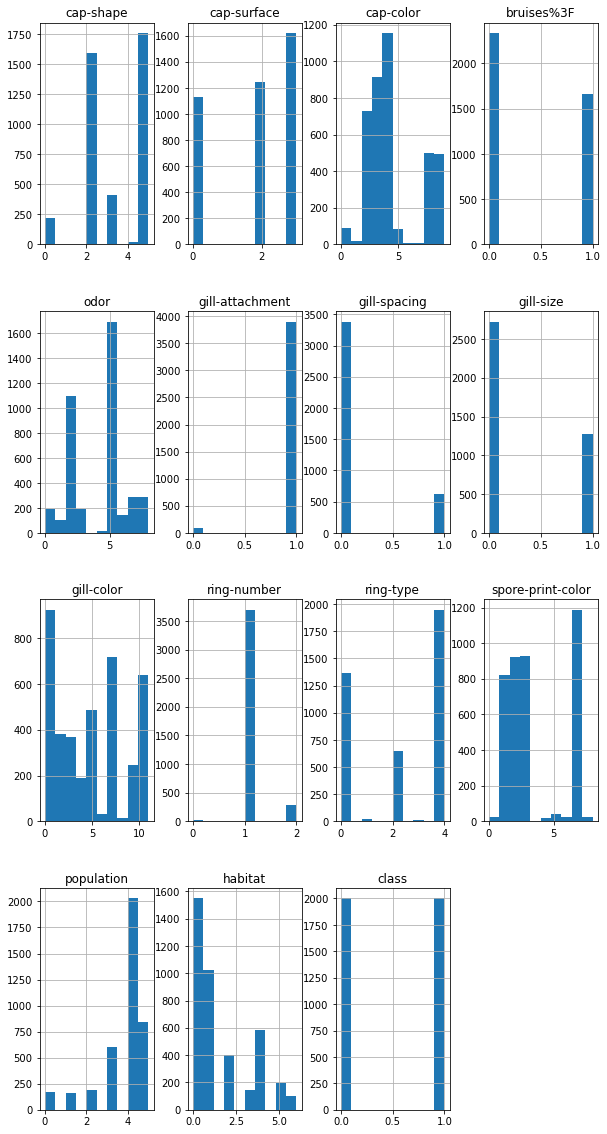

In [13]:
fig = plt.figure(figsize = (10,20))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


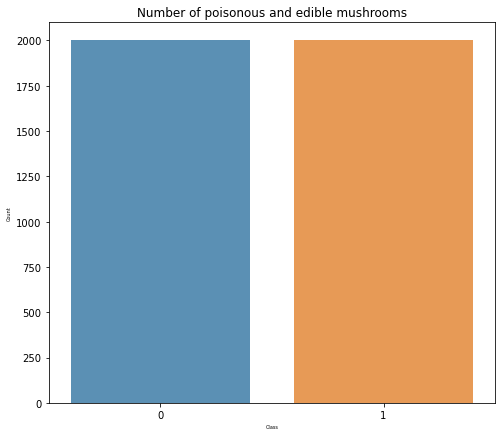

In [14]:
count = df['class'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(count.index, count.values, alpha=0.8)
plt.ylabel('Count', fontsize=5)
plt.xlabel('Class', fontsize=5)
plt.title('Number of poisonous and edible mushrooms')
plt.show()

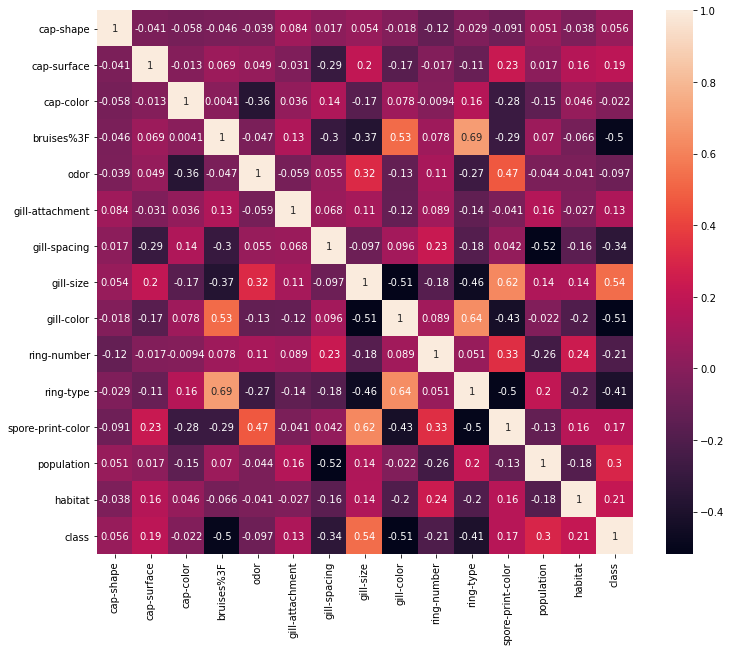

In [15]:
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.figure(figsize=(12,10))
ax = sns.heatmap(df.corr(), annot=True)

For classification, we chose the least correlating variable, which from observing the heat map is either;
- `gill-color` at __-0.5__
- `bruises%3F` at __-0.51__
- `ring-type` at __-0.41__

### Exploring Gill Color

In [16]:
class_vs_gill_color = df[['class', 'gill-color']].groupby(['gill-color'], as_index=False).mean().sort_values(by='class', ascending=False)
class_vs_gill_color

,gill-color,class
0,0,1.000000
8,8,1.000000
3,3,0.703804
2,2,0.676316
7,7,0.458333
11,11,0.275000
10,10,0.227425
4,4,0.193717
5,5,0.121649
9,9,0.101626


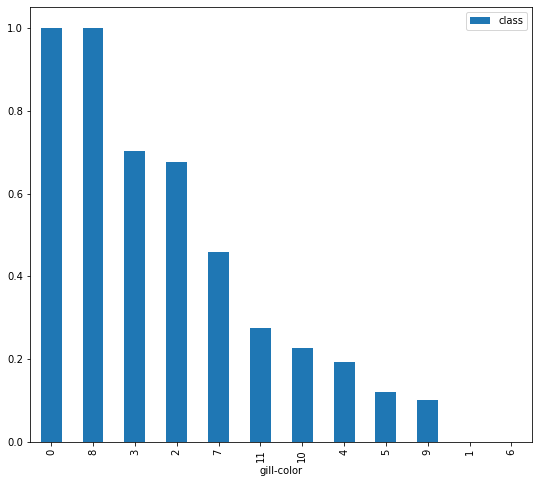

In [17]:
class_vs_gill_color.plot(x="gill-color", y="class", kind="bar",figsize=(9,8))
plt.show()

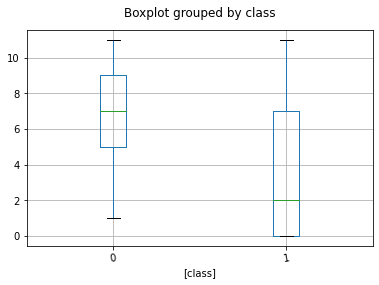

In [18]:
df.boxplot(column='gill-color', by=['class'], rot=10)
plt.title("")
plt.show()

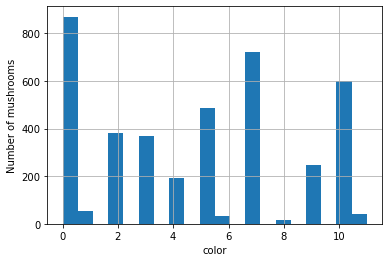

In [19]:
df['gill-color'].hist(bins=20)
plt.xlabel('color')
plt.ylabel('Number of mushrooms')
plt.show()

### Exploring Bruises

In [20]:
class_vs_bruises = df[['class', 'bruises%3F']].groupby(['bruises%3F'], as_index=False).mean().sort_values(by='class', ascending=False)
class_vs_bruises

,bruises%3F,class
0,0,0.709940
1,1,0.205882


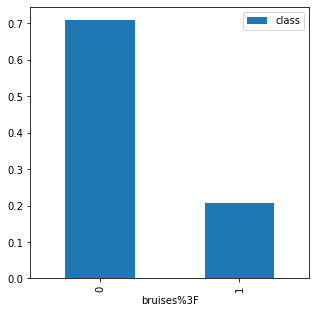

In [21]:
class_vs_bruises.plot(x="bruises%3F", y="class", kind="bar",figsize=(5,5))
plt.show()

### Exploring Ring Type

In [22]:
class_vs_ring_type = df[['class', 'ring-type']].groupby(['ring-type'], as_index=False).mean().sort_values(by='class', ascending=False)
class_vs_ring_type

,ring-type,class
2,2,1.000000
3,3,1.000000
0,0,0.652524
4,4,0.227646
1,1,0.000000


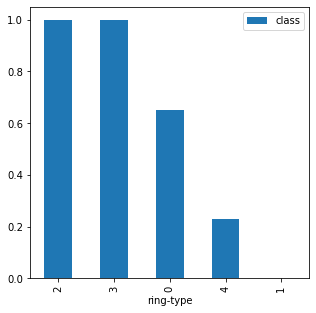

In [23]:
class_vs_ring_type.plot(x="ring-type", y="class", kind="bar",figsize=(5,5))
plt.show()

__Findings__

From the exploration data analysis we applied above, it's observed that __gill-color__ is a huge factor in determining if a mushroom is edible or not.

I can examine that:

- `gill-colors` __b and r__ are all poisonous.
- __0.709940%__ of mushrooms without `bruises` are edible.
- `ring-type` __n and p__ are all poisonous.


kNN CLUSTERING

In [24]:
k=4
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(df)

In [25]:
clustered_data_sklearn

KMeans(n_clusters=4)

In [26]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

In [27]:
data_and_centers = np.r_[df,clustered_data_sklearn.cluster_centers_]

In [28]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)

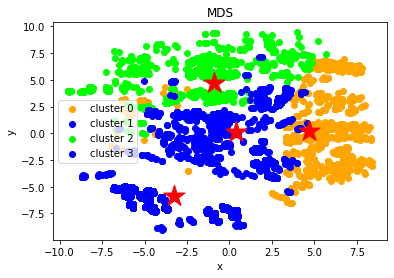

In [29]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

In [30]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


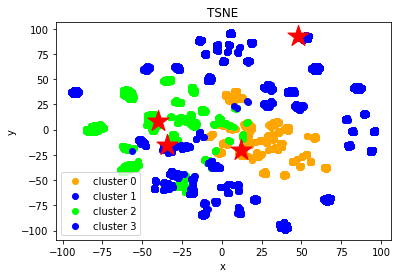

In [31]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

In [32]:
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)
df.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,ring-number,ring-type,spore-print-color,population,habitat,class,cluster
0,5,0,2,1,5,1,0,0,9,1,4,2,4,0,0,2
1,2,3,3,1,5,1,0,0,9,1,4,2,4,0,0,2
2,5,2,5,1,5,1,0,0,10,2,0,7,1,6,0,2
3,0,2,8,0,5,1,1,0,2,2,4,7,2,1,0,0
4,2,3,2,1,5,1,0,0,10,1,4,3,4,0,0,2


In [33]:
df.groupby('cluster').mean()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,ring-number,ring-type,spore-print-color,population,habitat,class
cluster,,,,,,,,,,,,,,,
0,3.180932,1.826652,8.520043,0.460455,2.587216,1.000000,0.223185,0.130011,4.887324,1.052004,2.810401,2.175515,3.342362,1.768147,0.486457
1,3.297468,2.474684,3.011603,0.061181,5.569620,1.000000,0.021097,0.917722,0.107595,1.082278,0.101266,6.991561,3.797468,2.168776,0.921941
2,3.251163,1.684651,3.466047,0.791628,4.747907,0.945116,0.109767,0.133953,8.986047,1.136744,3.622326,3.489302,3.905116,0.948837,0.165581
3,3.541746,1.435484,3.215370,0.314991,3.574953,0.962049,0.258065,0.134725,4.580645,1.004744,2.436433,1.930740,3.591082,1.392789,0.473435


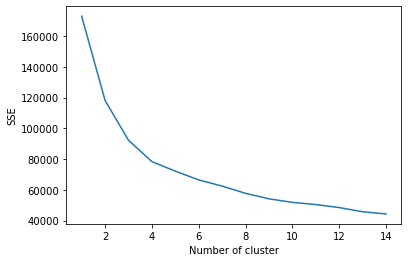

In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
sse = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df)
    df["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

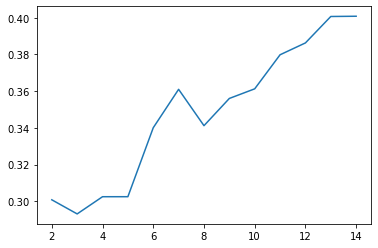

In [35]:
from sklearn.cluster import KMeans # import.

# silhouette scores to choose number of clusters.
from sklearn.metrics import silhouette_score
def sil_score(df):
    sse_ = []
    for k in range(2, 15):
        kmeans = KMeans(n_clusters=k, random_state=123).fit(df) # fit.
        sse_.append([k, silhouette_score(df, kmeans.labels_)])
    plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])

sil_score(df)

### Preparing the Data

In [36]:
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

# imports necessary for dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn import svm

# regression algorithms
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# metrics for evaluating regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
X = df.drop(['class'], axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

## SVM Classification

In [37]:
##from sklearn.svm import SVC
#svm = SVC(random_state=42, gamma="auto")
#svm.fit(X_train, y_train)
#print("Test Accuracy: {}%".format(round(svm.score(X_test, y_test)*100, 2)))

In [38]:
#y_pred_svm = svm.predict(X_test)
#print("SVM Classifier report: \n\n", classification_report(y_test, y_pred_svm))

## Naive Bayes Classification

In [39]:
#from sklearn.naive_bayes import GaussianNB
#nb = GaussianNB()
#nb.fit(X_train, y_train)
#print("Test Accuracy: {}%".format(round(nb.score(X_test, y_test)*100, 2)))

In [40]:
#y_pred_nb = nb.predict(X_test)
#print("Naive Bayes Classifier report: \n\n", classification_report(y_test, y_pred_nb))

## Random Forest Pipeline

In [41]:
preprocess_pipeline = make_pipeline(StandardScaler())

In [42]:
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                       ('reduce_dim', 'passthrough'),
                       ('regresson', RandomForestRegressor(n_estimators=10))])

In [43]:
N_FEATURES_OPTIONS = [2, 6, 8]
MAX_DEPTH_OPTIONS = [2, 4, 6, 8]

param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7)],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'regresson__max_depth': MAX_DEPTH_OPTIONS
    },
    {
        'reduce_dim': [RFE(svm.SVR(kernel='linear', gamma='auto')),RFE(LinearRegression())],
        'reduce_dim__n_features_to_select': N_FEATURES_OPTIONS,
        'regresson__max_depth': MAX_DEPTH_OPTIONS
    }  
]

search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=5, refit=True)
search.fit(X_train, y_train)

print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

# store the best params and best model for later use
RF_best_params = search.best_params_
RF_best_model = search.best_estimator_

Best CV score = 0.997:
Best parameters:  {'reduce_dim': RFE(estimator=SVR(gamma='auto', kernel='linear'), n_features_to_select=8), 'reduce_dim__n_features_to_select': 8, 'regresson__max_depth': 8}


## Linear Regression Pipeline

In [44]:
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                       ('reduce_dim', 'passthrough'),
                       ('regresson', LinearRegression())])

In [45]:
N_FEATURES_OPTIONS = [2, 6, 8]
NORMALIZE_OPTIONS = [False, True]

param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7)],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'regresson__normalize': NORMALIZE_OPTIONS
    },
    {
        'reduce_dim': [RFE(svm.SVR(kernel='linear', gamma='auto')),RFE(LinearRegression())],
        'reduce_dim__n_features_to_select': N_FEATURES_OPTIONS,
        'regresson__normalize': NORMALIZE_OPTIONS
    }  
]

search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=5, refit=True)
search.fit(X_train, y_train)
print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

# store the best params and best model for later use
LR_best_params = search.best_params_
LR_best_model = search.best_estimator_

Best CV score = 0.676:
Best parameters:  {'reduce_dim': RFE(estimator=SVR(gamma='auto', kernel='linear'), n_features_to_select=8), 'reduce_dim__n_features_to_select': 8, 'regresson__normalize': False}


## Support Vector Regression

In [46]:
from sklearn.svm import SVR
pipe = Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [47]:
N_FEATURES_OPTIONS = [2, 6, 8]
NORMALIZE_OPTIONS = [False, True]

param_grid={
            'svr__C': [0.1, 1, 10, 100, 1000],
            'svr__epsilon': [0.0001, 0.0005,  0.001, 0.005,  0.01, 0.05, 1, 5, 10],
            'svr__gamma': [0.0001, 0.0005,  0.001, 0.005,  0.01, 0.05, 1, 5, 10]
        }

search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=5, refit=True)
search.fit(X_train, y_train)
print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

# store the best params and best model for later use
SVR_best_params = search.best_params_
SVR_best_model = search.best_estimator_

Best CV score = 0.999:
Best parameters:  {'svr__C': 1000, 'svr__epsilon': 0.0001, 'svr__gamma': 0.05}


In [48]:
# model - a trained regression model

def evaluate_model(X_test, y_test, model):
    
    # compute predictiond for the test set
    _predicted_values = model.predict(X_test)
        
    # compute metrics
    _mse = mean_squared_error(y_test, _predicted_values)
    _mae = mean_absolute_error(y_test, _predicted_values)
    _r2 = r2_score(y_test, _predicted_values)
            
    return _mse, _mae, _r2

In [49]:
RF_mse, RF_mae, RF_r2 = evaluate_model(X_test, y_test, RF_best_model)
LR_mse, LR_mae, LR_r2 = evaluate_model(X_test, y_test, LR_best_model)
SVR_mse, SVR_mae, SVR_r2 = evaluate_model(X_test, y_test, SVR_best_model)

In [50]:
SVR_mse

6.167664786560197e-05

In [51]:
LR_mse

0.09400155806292024

In [52]:
RF_mse

0.0004461713611064261

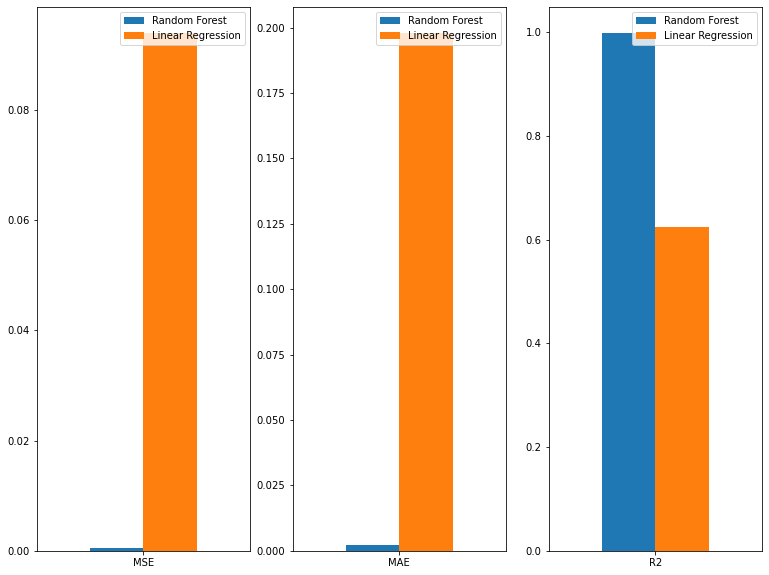

In [53]:
df_mse = pd.DataFrame({'Random Forest': RF_mse, 'Linear Regression': LR_mse}, index=['MSE'])
df_mae = pd.DataFrame({'Random Forest': RF_mae, 'Linear Regression': LR_mae}, index=['MAE'])
df_r2 = pd.DataFrame({'Random Forest': RF_r2, 'Linear Regression': LR_r2}, index=['R2'])

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13, 10))

df_mse.plot.bar(rot=0, ax=axes[0])
df_mae.plot.bar(rot=0, ax=axes[1])
df_r2.plot.bar(rot=0, ax=axes[2])

plt.show()

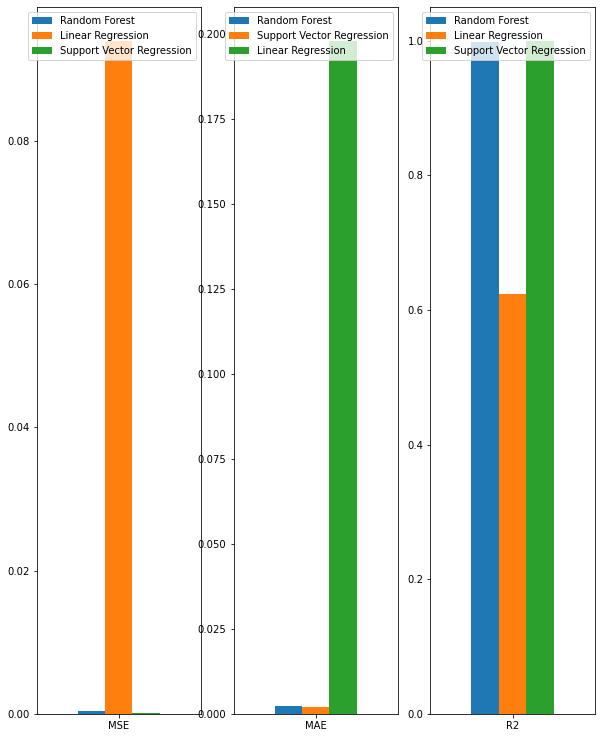

In [60]:
df_mse = pd.DataFrame({'Random Forest': RF_mse, 'Linear Regression': LR_mse, 'Support Vector Regression': SVR_mse },index=['MSE'])

df_mae = pd.DataFrame({'Random Forest': RF_mae,
                       'Support Vector Regression': SVR_mae,
                       'Linear Regression': LR_mae},
                      index=['MAE'])

df_r2 = pd.DataFrame({'Random Forest': RF_r2,
                      'Linear Regression': LR_r2,
                      'Support Vector Regression': SVR_r2},
                     index=['R2'])

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 13))

df_mse.plot.bar(rot=0, ax=axes[0])
df_mae.plot.bar(rot=0, ax=axes[1])
df_r2.plot.bar(rot=0, ax=axes[2])

plt.show()